# Ajuste de curvas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(3,1)$ y $(2,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(0,1)$, $(1,0)$ y $(2,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(3,1)$, obtenemos $\beta_1(3) + \beta_0 = 1$. Ahora, evaluando en el punto $(2,0)$, obtenemos $\beta_1(2) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 3 \\ 1 & 2\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-2, \, \beta_1=1$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
A=np.array([[3,1],[2,1]])
b=np.array([1,0])
np.linalg.inv(A)@b

array([ 1., -2.])

In [7]:
beta[0]

-2

In [8]:
beta[1]

1

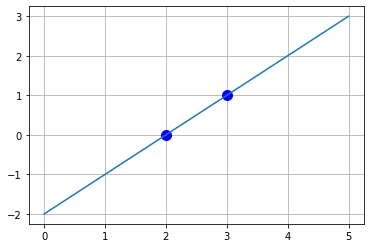

In [6]:
beta=[-2,1]
x=np.linspace(0,5,100)
y=beta[1]*x+beta[0]
plt.plot([3,2],[1,0],'bo',ms=10) # puntos: (3,1) y (2,0) -> (x,y)
plt.plot(x,y)
plt.grid()

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 0$. Finalmente, evaluando en el punto $(2,1)$, obtenemos $\beta_2(2)^2 + \beta_1(2) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & 0 & 0 \\ 1 & 1 & 1 \\ 1 & 2 & 4 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=1, \, \beta_1=-2$ y $\beta_2=1$.

In [4]:
A=np.array([[0,0,1],[1,1,1],[4,2,1]])
b=np.array([1,0,1])
np.linalg.inv(A)@b

array([ 1., -2.,  1.])

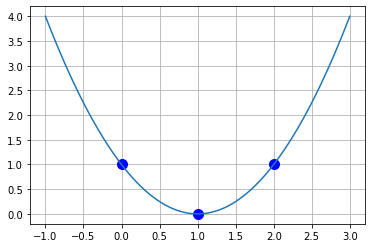

In [10]:
beta=[1,-2,1]
x=np.linspace(-1,3,100)
y=beta[0]+beta[1]*x+beta[2]*x**2
plt.plot([0,1,2],[1,0,1],'bo',ms=10) # puntos: (0,1), (1,0) y (2,1)
plt.plot(x,y)
plt.grid()

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de **'*bonitos*'** en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^\top$, de forma que la función evaluada en los puntos $x_i$ i.e.($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1,\quad\cdots\quad, y_n\right]^\top$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

In [11]:
from scipy.optimize import minimize

In [34]:
minimize?

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

In [18]:
np.random.uniform(-2,2,100)

array([ 5.09750364e-01, -6.34792775e-01, -1.42021862e+00, -1.77221884e+00,
       -1.61699063e+00,  1.14001520e+00,  1.15398831e+00, -6.12523530e-01,
        4.30764348e-01, -1.75250438e+00, -1.00843567e+00, -1.98215419e-01,
        1.99838813e+00, -3.15819765e-01, -1.35556304e+00,  1.66731930e+00,
        1.79400172e+00, -1.80301529e+00,  4.67664541e-01, -1.69636502e+00,
        3.91510268e-01, -1.02038787e+00,  1.27652758e+00,  1.77506401e+00,
       -9.86128339e-01, -1.94360806e+00, -6.53469214e-01,  2.98693403e-01,
        1.83419229e+00, -1.87558326e-01,  1.11974031e+00, -1.68035099e+00,
        1.84615195e+00,  3.85396607e-01, -1.37989111e+00,  1.88248230e+00,
       -1.36047723e+00,  1.27789347e+00, -2.25416098e-01, -1.65509103e+00,
        7.32361400e-01, -1.61148730e+00, -1.70052103e+00, -1.29303419e+00,
       -1.52781086e+00,  1.48074876e+00, -4.12766065e-01, -1.49253001e+00,
        9.28207346e-01, -1.04086822e+00, -5.95102817e-01,  1.78696885e+00,
       -5.33436179e-01, -

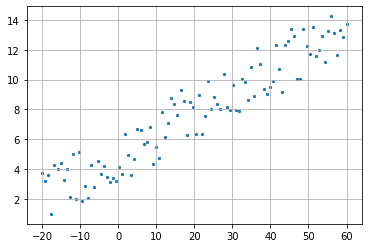

In [25]:
x=np.linspace(-20,60,100)
y=5+1/7*x+np.random.uniform(-2,2,100)
plt.scatter(x,y,s=5)
plt.grid()

In [26]:
# definir la función a minimizar (minimos cuadrados)
def min_cuad(beta,x,y):
    f=beta[0]+beta[1]*x # función a ajustar (polinomio de grado 1)
    return sum((y-f)**2)

In [33]:
beta0=np.random.rand(2)
beta0

array([0.67730159, 0.72494481])

In [37]:
1/7

0.14285714285714285

In [38]:
sol=minimize(min_cuad,beta0,args=(x,y))
sol.x

array([4.90300646, 0.1413994 ])

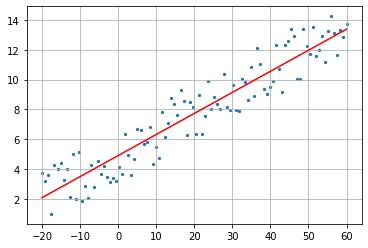

In [40]:
plt.scatter(x,y,s=5)
f=sol.x[0]+sol.x[1]*x
plt.plot(x,f,'r')
plt.grid()

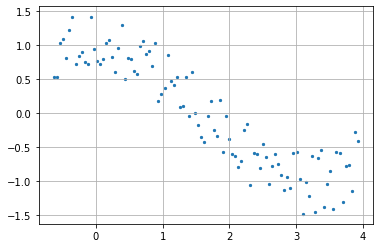

In [47]:
x=np.linspace(-np.pi/5,5*np.pi/4,100)
y=np.cos(x)+np.random.uniform(-0.5,0.5,100)
plt.scatter(x,y,s=5)
plt.grid()

In [50]:
# ajustando a una línea recta

#redefiniendo mínimos cuadrados
def min_cuad(beta,x,y,f):
    return sum((y-f(beta,x))**2)
def f1(beta,x):
    return beta[0]+beta[1]*x

In [54]:
#minimize?

In [52]:
beta0=np.random.rand(2)
sol1=minimize(min_cuad,beta0,args=(x,y,f1))
sol1

      fun: 11.946544791338493
 hess_inv: array([[ 0.01270988, -0.00467454],
       [-0.00467454,  0.00283419]])
      jac: array([-3.57627869e-07,  5.96046448e-07])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([ 0.86908855, -0.5397773 ])

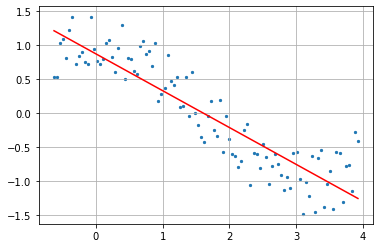

In [53]:
plt.scatter(x,y,s=5)
plt.plot(x,f1(sol1.x,x),'r')
plt.grid()

In [55]:
# Ajustando un polinomio de grado 2
def f2(beta,x):
    return beta[0]+beta[1]*x+beta[2]*x**2
beta0=np.random.rand(3)
sol2=minimize(min_cuad,beta0,args=(x,y,f2))
sol2

      fun: 11.845315114170644
 hess_inv: array([[ 0.0145463 , -0.01101015,  0.00192066],
       [-0.01101015,  0.02469204, -0.00662625],
       [ 0.00192066, -0.00662625,  0.00200876]])
      jac: array([-1.19209290e-07, -5.96046448e-07,  1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 4
     njev: 8
   status: 0
  success: True
        x: array([ 0.88837057, -0.60630014,  0.02016655])

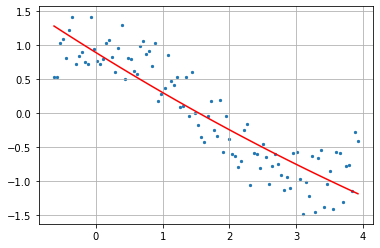

In [56]:
plt.scatter(x,y,s=5)
plt.plot(x,f2(sol2.x,x),'r')
plt.grid()

In [64]:
# Ajustando un polinomio de grado 3
def f3(beta,x):
    return beta[0]+beta[1]*x+beta[2]*x**2+beta[3]*x**3
beta0=np.random.rand(4)
sol3=minimize(min_cuad,beta0,args=(x,y,f3))
sol3

      fun: 7.138917442487018
 hess_inv: array([[ 0.01537739, -0.00548577, -0.00356181,  0.00110801],
       [-0.00548577,  0.06141332, -0.04306886,  0.00736511],
       [-0.00356181, -0.04306886,  0.03817481, -0.00730921],
       [ 0.00110801,  0.00736511, -0.00730921,  0.0014772 ]])
      jac: array([2.75373459e-05, 4.11272049e-06, 2.81929970e-05, 2.74598598e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 268
      nit: 4
     njev: 43
   status: 2
  success: False
        x: array([ 0.97681806, -0.01838245, -0.56328989,  0.11791745])

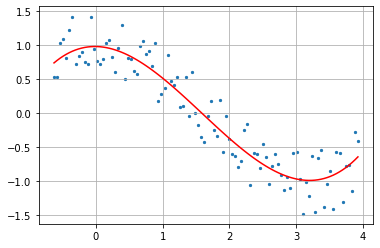

In [65]:
plt.scatter(x,y,s=5)
plt.plot(x,f3(sol3.x,x),'r')
plt.grid()

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.